In [12]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/livingroom.jpeg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 974ms/step
Class:  light_fixture
Confidence Score: 0.77603704


In [ ]:
#Plot the accuracy/loss over the progression of training (epochs)
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

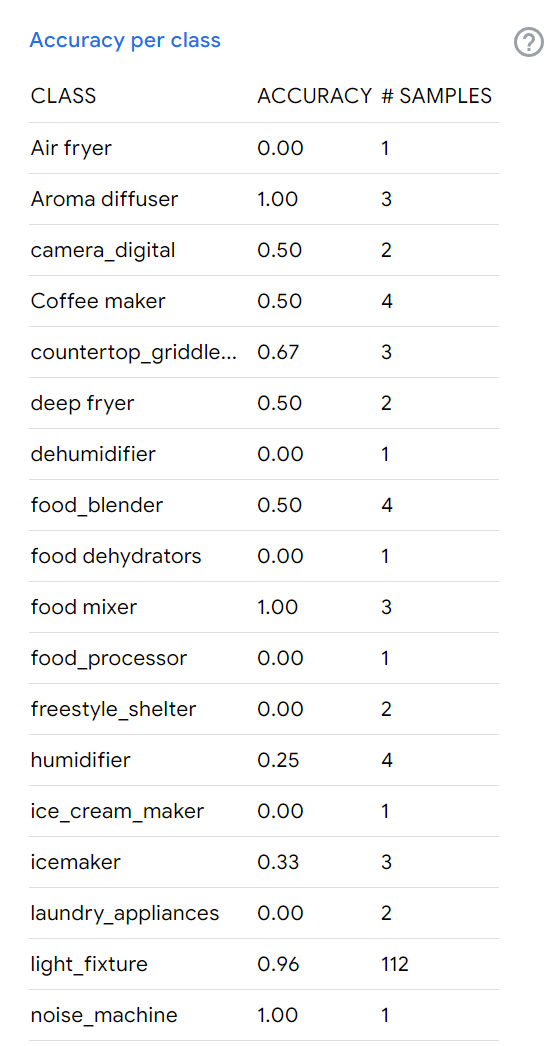

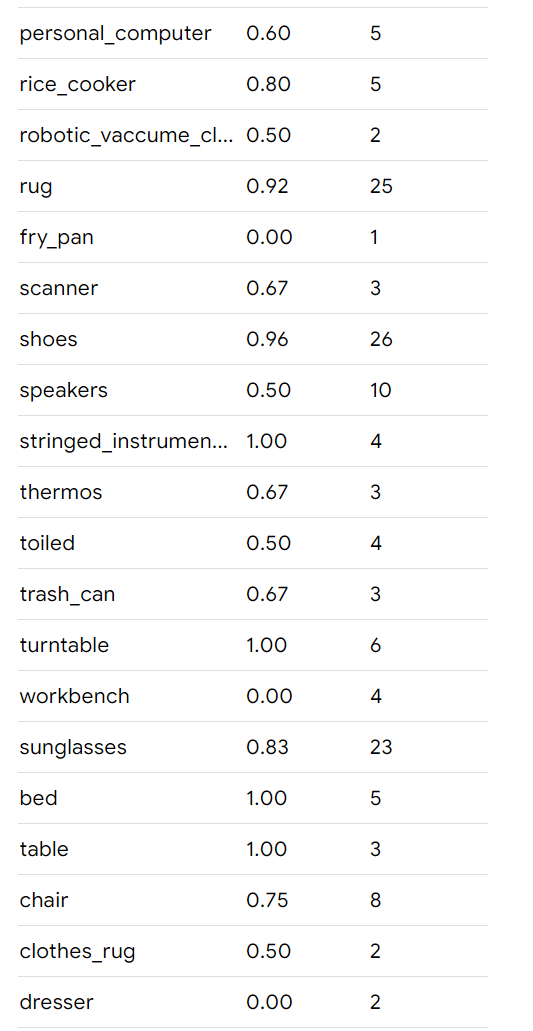

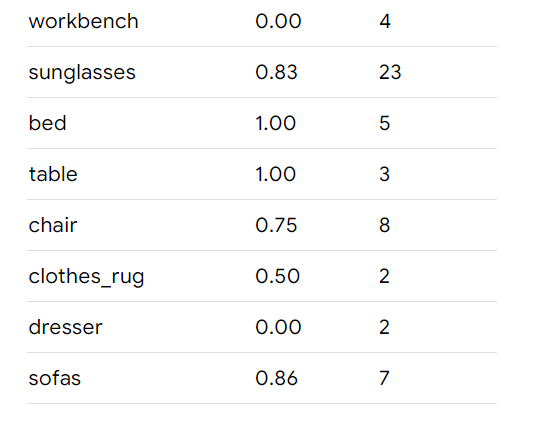

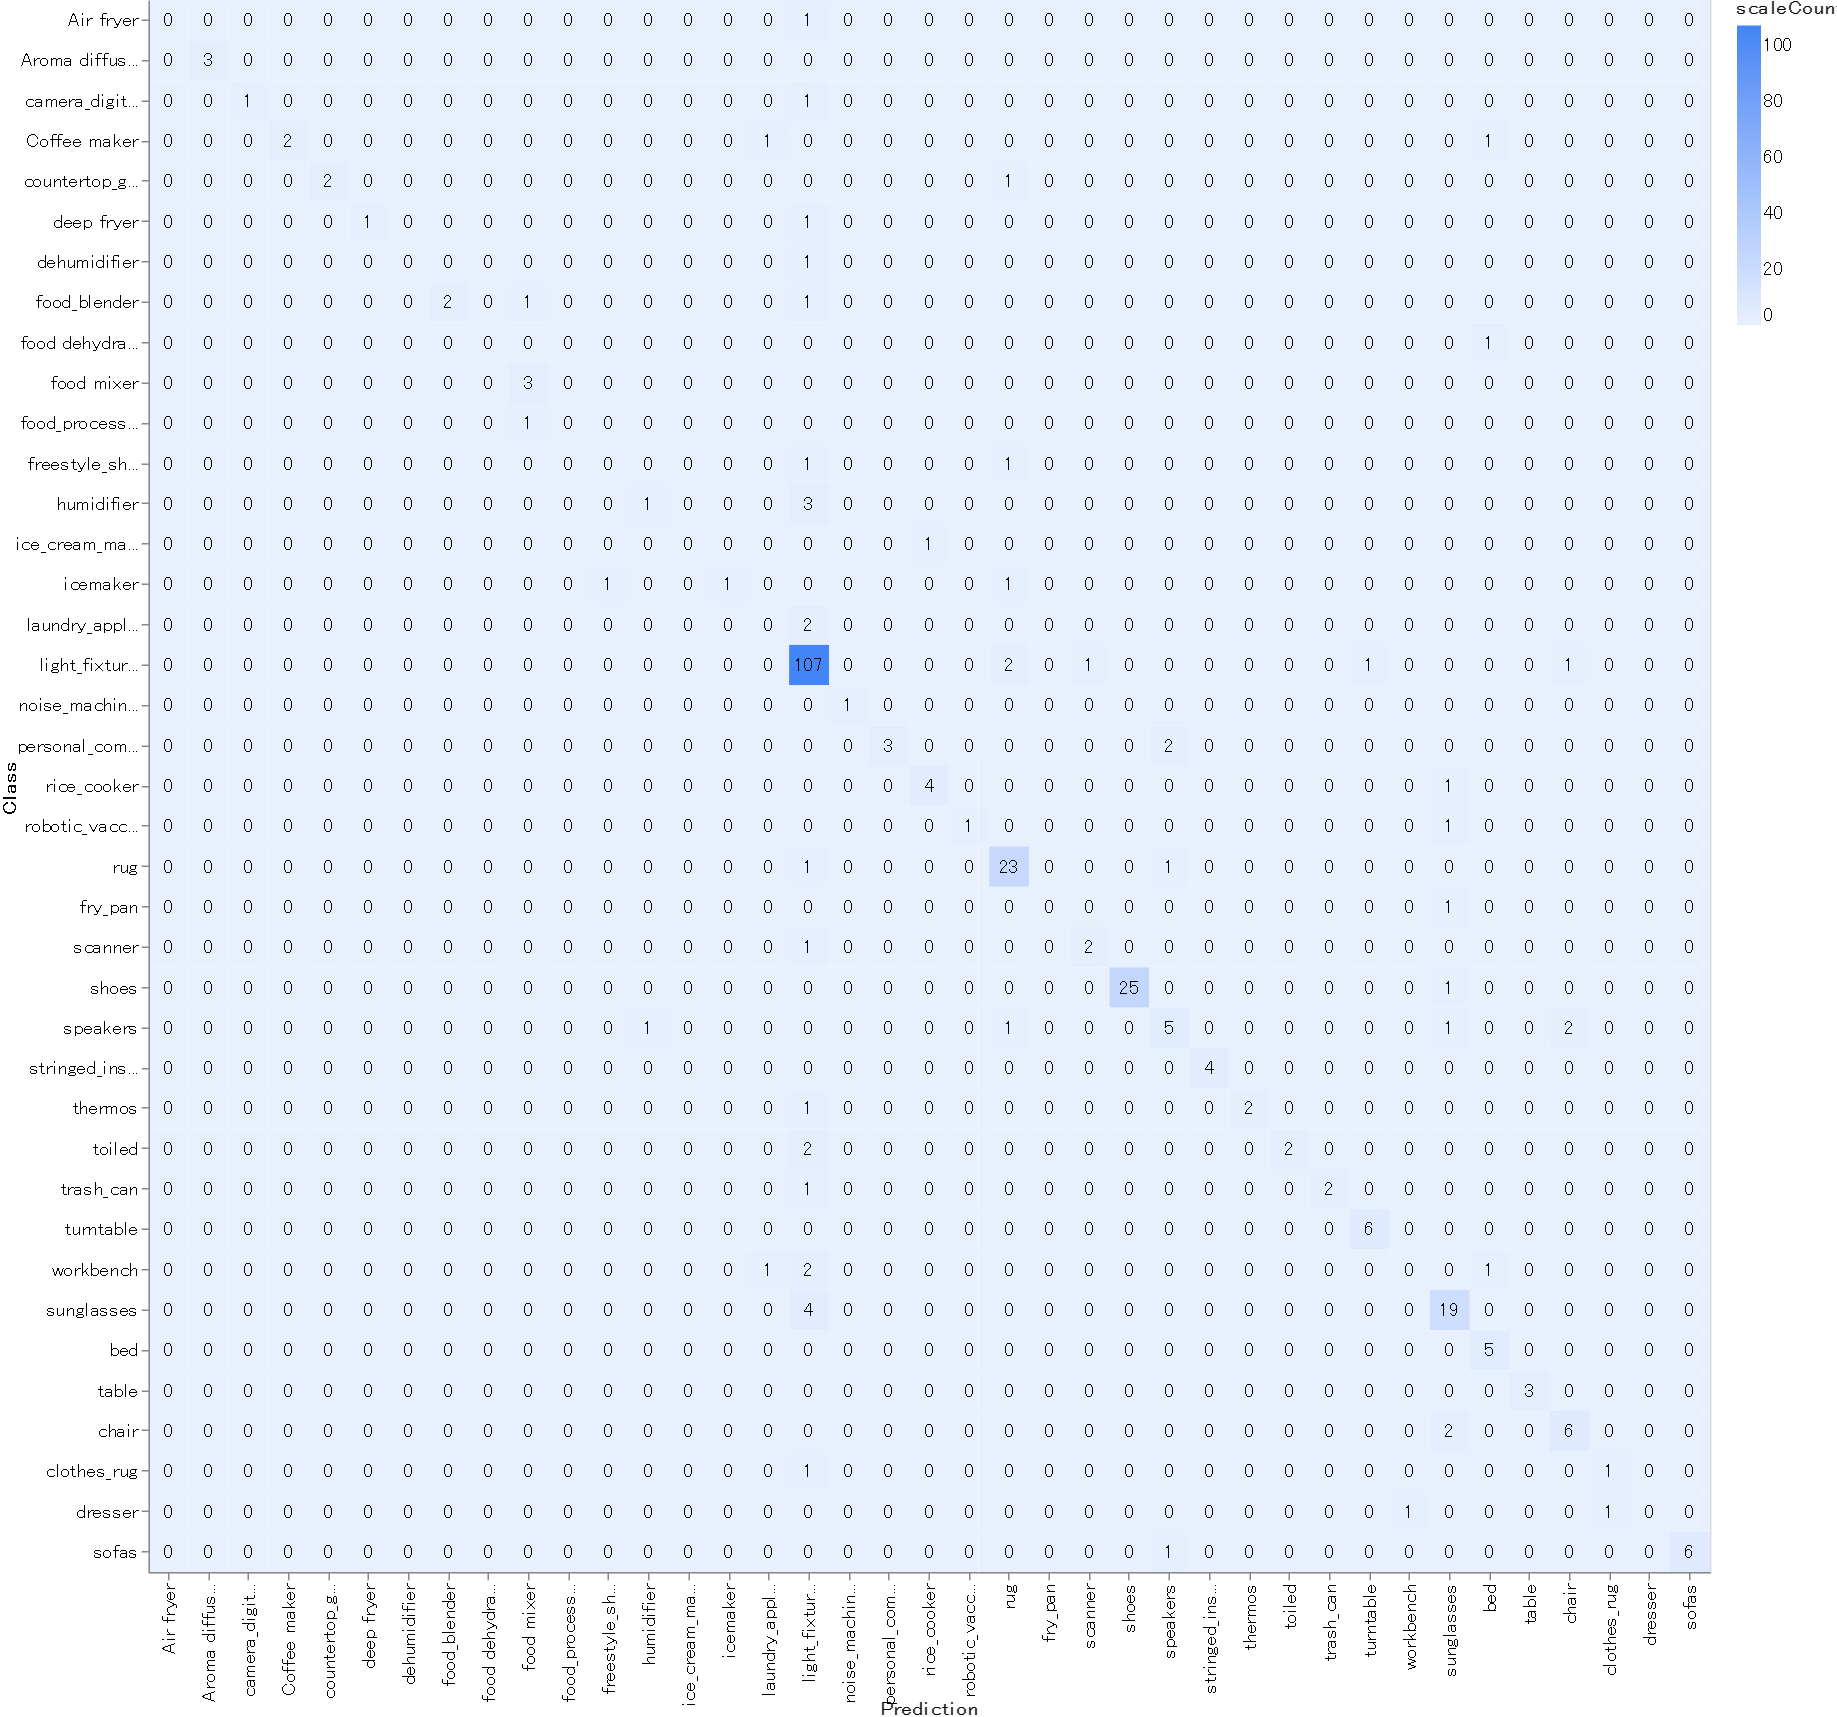

In [5]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 39)                132000    
                                                                 
Total params: 542,208
Trainable params: 528,128
Non-trainable params: 14,080
_________________________________________________________________


In [7]:
prediction

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00000004, 0.        , 0.        , 0.        ,
        0.00000006, 0.00002966, 0.        , 0.00000005, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00000003, 0.        ,
        0.        , 0.00000128, 0.        , 0.9999689 , 0.        ,
        0.        , 0.        , 0.        , 0.00000002]], dtype=float32)

In [9]:
class_names

['0 Air fryer\n',
 '1 Aroma diffuser\n',
 '2 camera_digital\n',
 '3 Coffee maker\n',
 '4 countertop_griddle...\n',
 '5 deep fryer\n',
 '6 dehumidifier\n',
 '7 food_blender\n',
 '8 food dehydrators\n',
 '9 food mixer\n',
 '10 food_processor\n',
 '11 freestyle_shelter\n',
 '12 humidifier\n',
 '13 ice_cream_maker\n',
 '14 icemaker\n',
 '15 laundry_appliances\n',
 '16 light_fixture\n',
 '17 noise_machine\n',
 '18 personal_computer\n',
 '19 rice_cooker\n',
 '20 robotic_vaccume_cl...\n',
 '21 rug\n',
 '22 fry_pan\n',
 '23 scanner\n',
 '24 shoes\n',
 '25 speakers\n',
 '26 stringed_instrumen...\n',
 '27 thermos\n',
 '28 toiled\n',
 '29 trash_can\n',
 '30 turntable\n',
 '31 workbench\n',
 '32 sunglasses\n',
 '33 bed\n',
 '34 table\n',
 '35 chair\n',
 '36 clothes_rug\n',
 '37 dresser\n',
 '38 sofas\n']

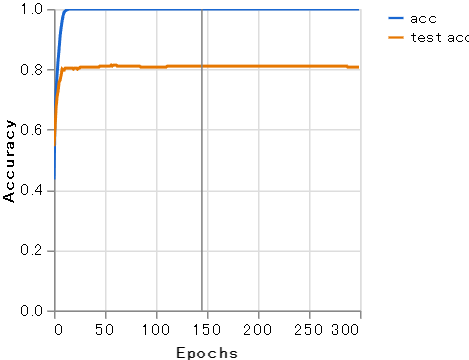

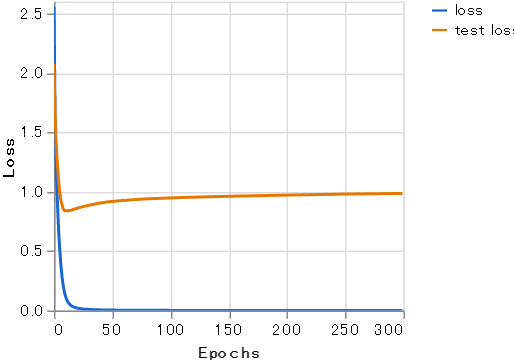

In [18]:
# similarity of input image to category images ----- next task